In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.stats import skew, kurtosis

g = globals()

In [2]:
def Plot_Opinion_Distribution_2d(data1, data2, data_act):
    op1_list = data1
    op2_list = data2

    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].set_title("Topic 1")
    ax[0].set_xlabel("Opinion")
    ax[0].set_ylabel("# of Opinions on Topic 1")
    ax[0].hist(op1_list, bins=120)
    ax[1].set_title("Topic 2")
    ax[1].set_xlabel("Opinion")
    ax[1].set_ylabel("# of Opinions on Topic 2")
    ax[1].hist(op2_list, bins=120)
    ax[2].set_title("Opinion-Space")
    ax[2].set_xlabel("Opinion 1")
    ax[2].set_ylabel("Opinion 2")
    ax[2].scatter(op1_list, op2_list, c=data_act, cmap='cool', marker = '2')
    plt.show()

# Calculating the Bimodality coefficient of a dataset
def BC(sk, ku, N):
    coeff = (sk**2+1) / (ku-3 + 3 * (N-1)**2 / ((N-2)*(N-3)))
    return coeff

In [3]:
bounds = [1, 2, 3, 5, 10]
fracs = [0.01, 0.05, 0.1, 0.15, 0.2]
num_sim = 5 # Number of simulations per dataset

for b in bounds:
    for f in fracs:
        for s in range (1, num_sim+1):
            Filename = f'a2_b3_g1.0_e2_1_bound_{b}_frac_{f}_{s}'
            homophily = "b3"
            g[f"data_b3_{b}_{f}_{s}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\Bound\{homophily}\{Filename}.csv', delimiter=',')

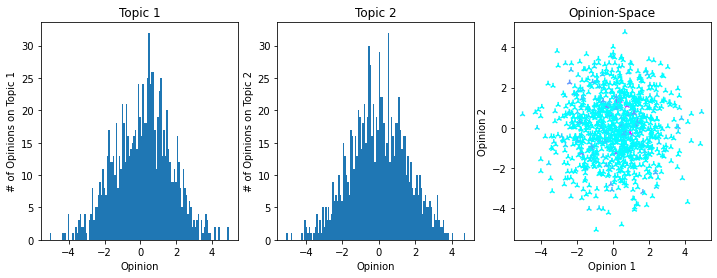

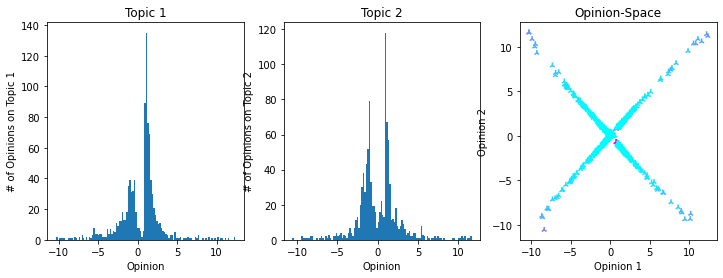

Kurtosis:  3.6482382985357305 Bimodality-Coefficient:  0.3237450706095638


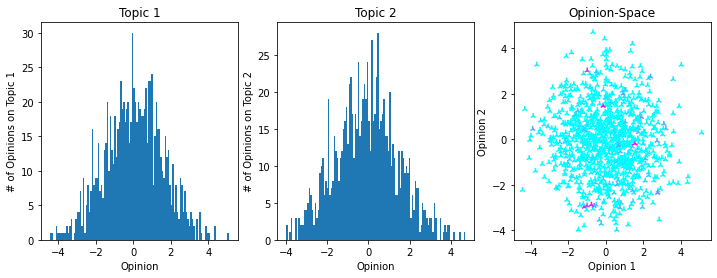

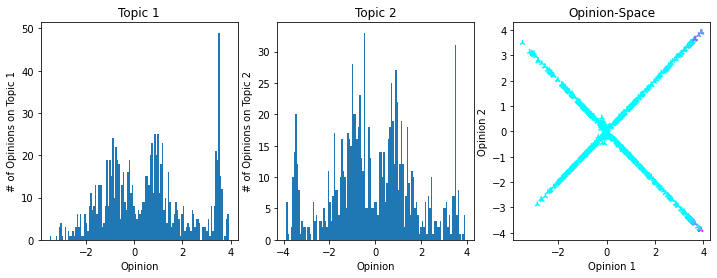

Kurtosis:  -0.3972926476693659 Bimodality-Coefficient:  -2.5829687309142826


In [4]:
# Looking into Kurtosis and BC values for example distributions

Plot_Opinion_Distribution_2d(g["data_b3_1_0.01_2"][1], g["data_b3_1_0.01_2"][2], g["data_b3_1_0.01_2"][0])
Plot_Opinion_Distribution_2d(g["data_b3_1_0.01_2"][len(g["data_b3_1_0.01_2"])-2], g["data_b3_1_0.01_2"][len(g["data_b3_1_0.01_2"])-1], g["data_b3_1_0.01_2"][0])

ku = kurtosis(g["data_b3_1_0.01_2"][len(g["data_b3_1_0.01_2"])-1])
sk = skew(g["data_b3_1_0.01_2"][len(g["data_b3_1_0.01_2"])-1])
bc = BC(sk, ku, 1000)

print("Kurtosis: ", ku, "Bimodality-Coefficient: ", bc)

Plot_Opinion_Distribution_2d(g["data_b3_5_0.2_2"][1], g["data_b3_5_0.2_2"][2], g["data_b3_5_0.2_2"][0])
Plot_Opinion_Distribution_2d(g["data_b3_5_0.2_2"][len(g["data_b3_5_0.2_2"])-2], g["data_b3_5_0.2_2"][len(g["data_b3_5_0.2_2"])-1], g["data_b3_5_0.2_2"][0])

ku = kurtosis(g["data_b3_5_0.2_2"][len(g["data_b3_5_0.2_2"])-1])
sk = skew(g["data_b3_5_0.2_2"][len(g["data_b3_5_0.2_2"])-1])
bc = BC(sk, ku, 1000)

print("Kurtosis: ", ku, "Bimodality-Coefficient: ", bc)

In [5]:
# Calculating curtosis and BC for all datasets. Saving in following array.
""" Rows are fracs, columns Boundaries
        1     2       3       5       10
0.01
0.05
0.1
0.15
0.2

Each entry has five entries for each simulation with the given parameterset, in which
the first entry is the skewness, the 2nd the kurtosis and the 3rd the bc of the dataset.
The sixth entry is the average of the three parameters over all simulations
"""

Coeffs_op1_b3 = np.empty((len(fracs), len(bounds), num_sim+1, 3))

frac_loop = []
for i in range(len(fracs)):
    frac_loop.append( (fracs[i], i) )

bound_loop = []
for i in range(len(bounds)):
    bound_loop.append( (bounds[i], i) )

for b1,b2 in bound_loop:
    for f1, f2 in frac_loop:
        for s in range (num_sim):

            length = len(g[f"data_b3_{b1}_{f1}_{s+1}"]) - 2
            
            # Calculate skewness, kurtosis and BC for the last iteration of opinion 1
            sk = skew( g[f"data_b3_{b1}_{f1}_{s+1}"][length] )
            ku = kurtosis( g[f"data_b3_{b1}_{f1}_{s+1}"][length] )
            bc = BC(sk, ku, 1000)

            Coeffs_op1_b3[f2][b2][s][0] = sk
            Coeffs_op1_b3[f2][b2][s][1] = ku
            Coeffs_op1_b3[f2][b2][s][2] = bc

            Coeffs_op1_b3[f2][b2][num_sim][0] += sk
            Coeffs_op1_b3[f2][b2][num_sim][1] += ku
            Coeffs_op1_b3[f2][b2][num_sim][2] += bc      
        
        Coeffs_op1_b3[f2][b2][num_sim][0] = Coeffs_op1_b3[f2][b2][num_sim][0] / num_sim
        Coeffs_op1_b3[f2][b2][num_sim][1] = Coeffs_op1_b3[f2][b2][num_sim][1] / num_sim
        Coeffs_op1_b3[f2][b2][num_sim][2] = Coeffs_op1_b3[f2][b2][num_sim][2] / num_sim

#print(Coeffs_op1)

Beta = 3


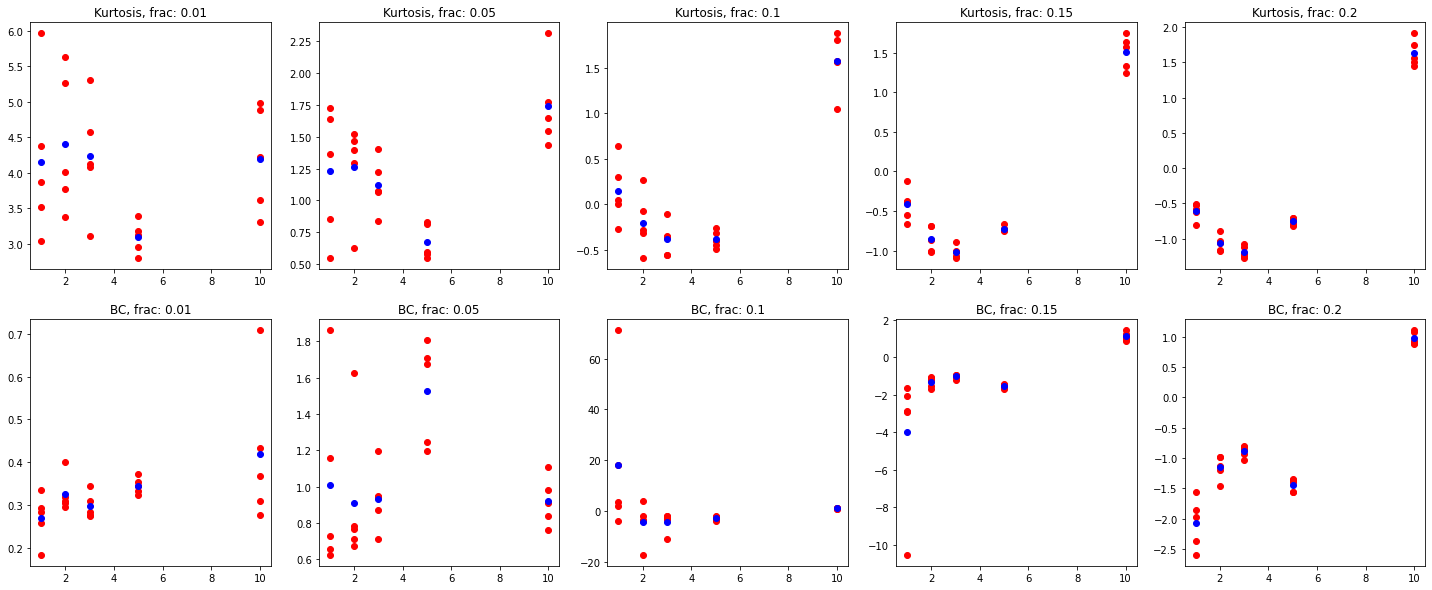

In [6]:
fig, ax = plt.subplots(2, len(bounds), figsize=(5*len(bounds), 2*len(bounds)), sharey=False)

for i in range (len(fracs)):
    for j in range (len(bounds)):
        ax[0][i].scatter(np.full(num_sim, bounds[j]), Coeffs_op1_b3[i][j][:num_sim,1], color='r')
        ax[1][i].scatter(np.full(num_sim, bounds[j]), Coeffs_op1_b3[i][j][:num_sim,2], color='r')
    ax[0][i].scatter(bounds, Coeffs_op1_b3[i][:,num_sim,1], color='b')
    ax[1][i].scatter(bounds, Coeffs_op1_b3[i][:,num_sim,2], color='b')
    ax[0][i].set_title(f"Kurtosis, frac: {fracs[i]}")
    ax[1][i].set_title(f"BC, frac: {fracs[i]}")

print("Beta = 3")

In [7]:
for b in bounds:
    for f in fracs:
        for s in range (1, num_sim+1):
            Filename = f'a2_b2.5_g2.1_e2_1_bound_{b}_frac_{f}_{s}'
            homophily = "b2.5"
            g[f"data_b2_5_{b}_{f}_{s}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\Bound\{homophily}\{Filename}.csv', delimiter=',')

In [8]:
Coeffs_op1_b2_5 = np.empty((len(fracs), len(bounds), num_sim+1, 3))

frac_loop = []
for i in range(len(fracs)):
    frac_loop.append( (fracs[i], i) )

bound_loop = []
for i in range(len(bounds)):
    bound_loop.append( (bounds[i], i) )

for b1,b2 in bound_loop:
    for f1, f2 in frac_loop:
        for s in range (num_sim):

            length = len(g[f"data_b2_5_{b1}_{f1}_{s+1}"]) - 2
            
            # Calculate skewness, kurtosis and BC for the last iteration of opinion 1
            sk = skew( g[f"data_b2_5_{b1}_{f1}_{s+1}"][length] )
            ku = kurtosis( g[f"data_b2_5_{b1}_{f1}_{s+1}"][length] )
            bc = BC(sk, ku, 1000)

            Coeffs_op1_b2_5[f2][b2][s][0] = sk
            Coeffs_op1_b2_5[f2][b2][s][1] = ku
            Coeffs_op1_b2_5[f2][b2][s][2] = bc

            Coeffs_op1_b2_5[f2][b2][num_sim][0] += sk
            Coeffs_op1_b2_5[f2][b2][num_sim][1] += ku
            Coeffs_op1_b2_5[f2][b2][num_sim][2] += bc      
        
        Coeffs_op1_b2_5[f2][b2][num_sim][0] = Coeffs_op1_b2_5[f2][b2][num_sim][0] / num_sim
        Coeffs_op1_b2_5[f2][b2][num_sim][1] = Coeffs_op1_b2_5[f2][b2][num_sim][1] / num_sim
        Coeffs_op1_b2_5[f2][b2][num_sim][2] = Coeffs_op1_b2_5[f2][b2][num_sim][2] / num_sim


Beta = 2.5


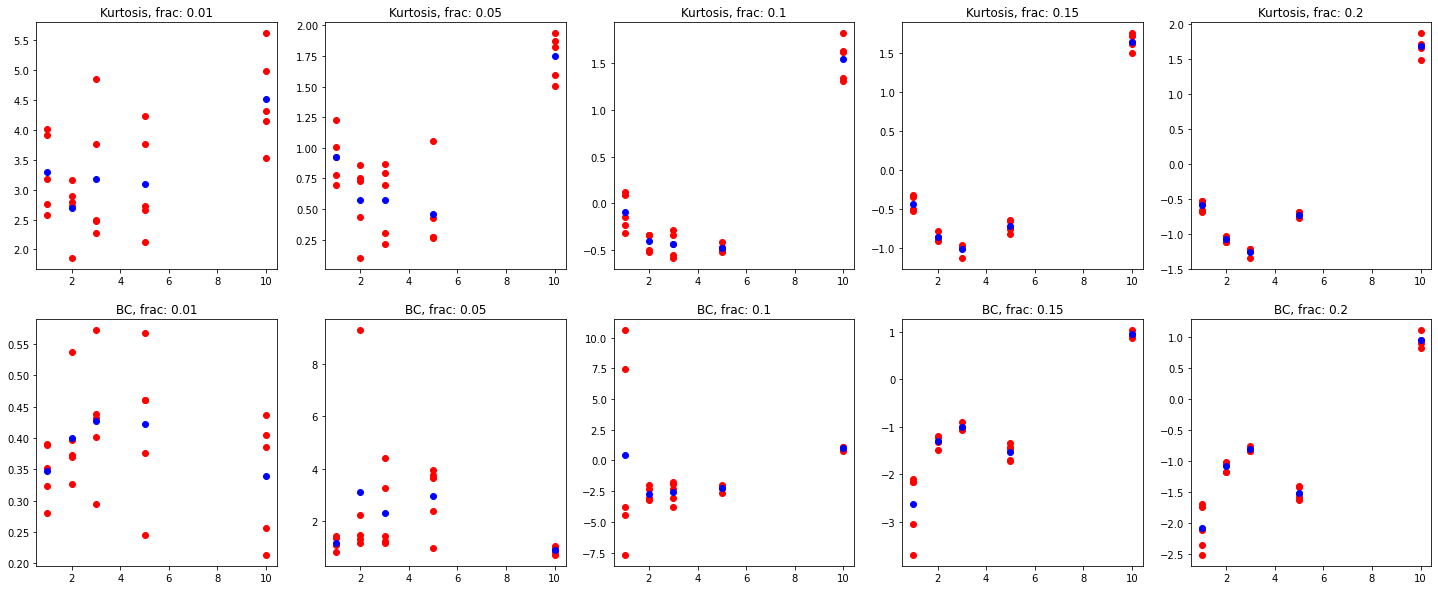

In [9]:
print("Beta = 2.5")

fig, ax = plt.subplots(2, len(bounds), figsize=(5*len(bounds), 2*len(bounds)), sharey=False)

for i in range (len(fracs)):
    for j in range (len(bounds)):
        ax[0][i].scatter(np.full(num_sim, bounds[j]), Coeffs_op1_b2_5[i][j][:num_sim,1], color='r')
        ax[1][i].scatter(np.full(num_sim, bounds[j]), Coeffs_op1_b2_5[i][j][:num_sim,2], color='r')
    ax[0][i].scatter(bounds, Coeffs_op1_b2_5[i][:,num_sim,1], color='b')
    ax[1][i].scatter(bounds, Coeffs_op1_b2_5[i][:,num_sim,2], color='b')
    ax[0][i].set_title(f"Kurtosis, frac: {fracs[i]}")
    ax[1][i].set_title(f"BC, frac: {fracs[i]}")

Frac: 0.01, Beta: 3


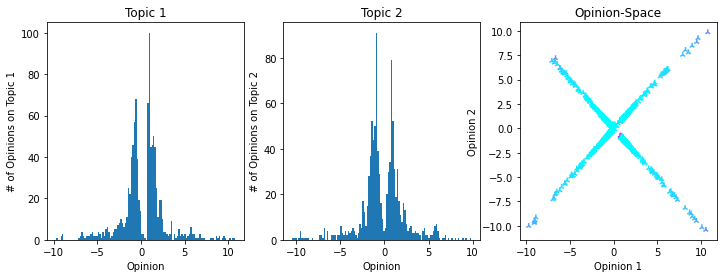

Boundary: 1  Kurtosis op1: 2.959698413802351  Bimodality-Coefficient op1: 0.35749439572750485


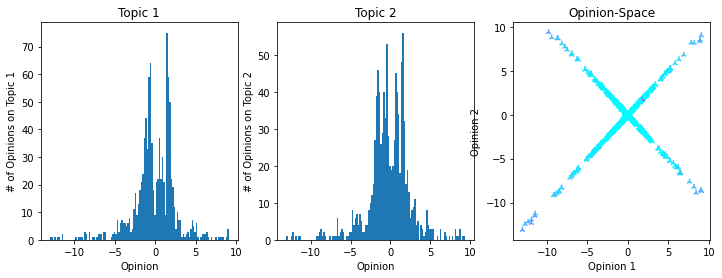

Boundary: 2  Kurtosis op1: 3.6983164381176454  Bimodality-Coefficient op1: 0.3757569643511887


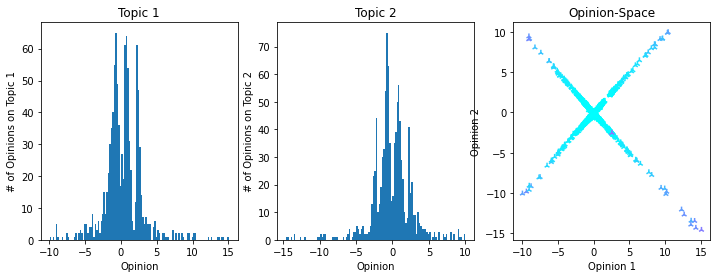

Boundary: 3  Kurtosis op1: 5.292027076389251  Bimodality-Coefficient op1: 0.27040268373945475


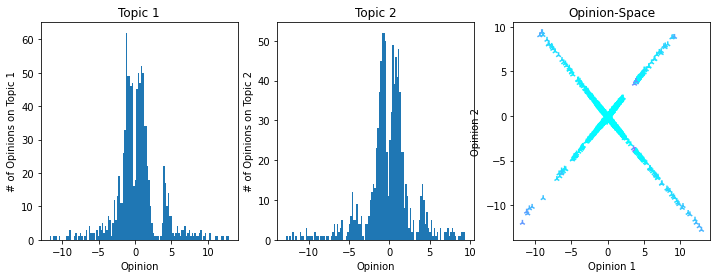

Boundary: 5  Kurtosis op1: 3.114912856349611  Bimodality-Coefficient op1: 0.4149041663490152


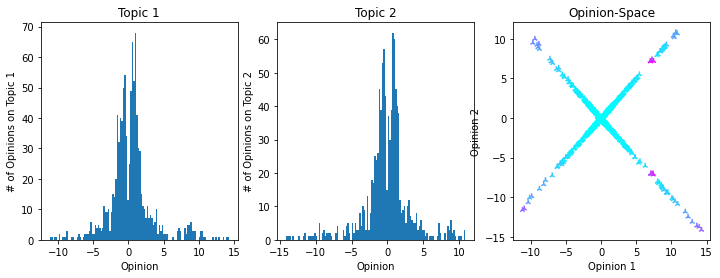

Boundary: 10  Kurtosis op1: 3.8286774725962216  Bimodality-Coefficient op1: 0.30620599490036626


In [10]:
### Examples

fr = 0.01
bet = "3"
print(f"Frac: {fr}, Beta: {bet}")

for i in bounds:
    Plot_Opinion_Distribution_2d(g[f"data_b{bet}_{int(i)}_{fr}_1"][len(g[f"data_b{bet}_{int(i)}_{fr}_1"])-2], g[f"data_b{bet}_{int(i)}_{fr}_1"][len(g[f"data_b{bet}_{int(i)}_{fr}_1"])-1], g[f"data_b{bet}_{int(i)}_{fr}_1"][0])

    ku = kurtosis(g[f"data_b{bet}_{int(i)}_{fr}_1"][len(g[f"data_b{bet}_{int(i)}_{fr}_2"])-1])
    sk = skew(g[f"data_b{bet}_{int(i)}_{fr}_1"][len(g[f"data_b{bet}_{int(i)}_{fr}_2"])-1])
    bc = BC(sk, ku, 1000)

    print("Boundary:", i, " Kurtosis op1:", ku, " Bimodality-Coefficient op1:", bc)